<a href="https://colab.research.google.com/github/2303A52060/Generative-AI/blob/main/GI_ASS_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB
None
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0       

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9960 - loss: 0.0345 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━

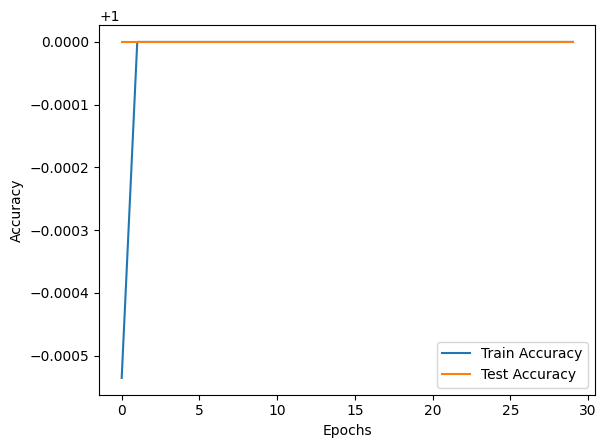

In [5]:
import zipfile
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define file paths
zip_path = "mnist_dataset.csv.zip"
extract_path = "./mnist_dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load the dataset
csv_path = os.path.join(extract_path, "mnist_dataset.csv")
mnist_df = pd.read_csv(csv_path)

# Inspect the dataset
print(mnist_df.info())
print(mnist_df.head())

# Check if dataset has correct number of features
expected_pixels = 784
actual_pixels = mnist_df.shape[1] - 1  # Subtracting label column
if actual_pixels < expected_pixels:
    # Add a missing column filled with zeros if necessary
    missing_pixels = expected_pixels - actual_pixels
    for i in range(missing_pixels):
        mnist_df[f'missing_{i}'] = 0
    print(f"Warning: Dataset had {actual_pixels} pixels instead of {expected_pixels}. Missing pixels filled with zeros.")

# Separate features and labels
X = mnist_df.iloc[:, 1:].values  # Pixel values
y = mnist_df.iloc[:, 0].values   # Labels

# Normalize pixel values
X = X / 255.0

# Reshape data for CNN (28x28 images, 1 channel)
X = X.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
num_classes = 10
y = to_categorical(y, num_classes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:500], y[:500], test_size=0.2, random_state=42)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("mnist_cnn_model.h5")
